# Retail Exploratory Data Analysis for Adidas

Adidas is a massive sports clothing brand with consumers all around the world. In this dataset, I will be exploring and analyzing data from the Adidas online store to make better sense of the data through visualizations.

In this dataset, I am curious about:
- The number of reviews submitted for each average rating, each category's average rating, and each color's average rating.
- The total number of colors by category.
- Most popular colors between genders and age groups.
- The most important and frequently used terminology in the names of products and descriptions.
- Are there any reason for any products to have a lower rating?

# Importing Data and Cleaning
The dataset to be used in this project can be found on Kaggle [here]("https://www.kaggle.com/datasets/thedevastator/adidas-fashion-retail-products-dataset-9300-prod").

In [3]:
import numpy as np
import pandas as pd

adidas = pd.read_csv("adidas_usa.csv")

print(adidas.shape)
adidas.head()

(845, 21)


,index,url,name,sku,selling_price,original_price,currency,availability,color,category,...,source_website,breadcrumbs,description,brand,images,country,language,average_rating,reviews_count,crawled_at
0,0,https://www.adidas.com/us/beach-shorts/FJ5089....,Beach Shorts,FJ5089,40,NaN,USD,InStock,Black,Clothing,...,https://www.adidas.com,Women/Clothing,Splashing in the surf. Making memories with yo...,adidas,"https://assets.adidas.com/images/w_600,f_auto,...",USA,en,4.5,35,2021-10-23 17:50:17.331255
1,1,https://www.adidas.com/us/five-ten-kestrel-lac...,Five Ten Kestrel Lace Mountain Bike Shoes,BC0770,150,NaN,USD,InStock,Grey,Shoes,...,https://www.adidas.com,Women/Shoes,Lace up and get after it. The Five Ten Kestrel...,adidas,"https://assets.adidas.com/images/w_600,f_auto,...",USA,en,4.8,4,2021-10-23 17:50:17.423830
2,2,https://www.adidas.com/us/mexico-away-jersey/G...,Mexico Away Jersey,GC7946,70,NaN,USD,InStock,White,Clothing,...,https://www.adidas.com,Kids/Clothing,"Clean and crisp, this adidas Mexico Away Jerse...",adidas,"https://assets.adidas.com/images/w_600,f_auto,...",USA,en,4.9,42,2021-10-23 17:50:17.530834
3,3,https://www.adidas.com/us/five-ten-hiangle-pro...,Five Ten Hiangle Pro Competition Climbing Shoes,FV4744,160,NaN,USD,InStock,Black,Shoes,...,https://www.adidas.com,Five Ten/Shoes,The Hiangle Pro takes on the classic shape of ...,adidas,"https://assets.adidas.com/images/w_600,f_auto,...",USA,en,3.7,7,2021-10-23 17:50:17.615054
4,4,https://www.adidas.com/us/mesh-broken-stripe-p...,Mesh Broken-Stripe Polo Shirt,GM0239,65,NaN,USD,InStock,Blue,Clothing,...,https://www.adidas.com,Men/Clothing,Step up to the tee relaxed. This adidas golf p...,adidas,"https://assets.adidas.com/images/w_600,f_auto,...",USA,en,4.7,11,2021-10-23 17:50:17.702680


## Checking Columns
To start, identify what columns we are working with. We can see there are columns with categorical values that can help us find differences based on this categorical data such as currency, country, or language.

We can see that each these columns only contain a single unique value. These columns will be dropped since they don't have much to add for later analysis. Other columns that won't be needed will be dropped as well.

In [5]:
adidas.columns

Index(['index', 'url', 'name', 'sku', 'selling_price', 'original_price',
       'currency', 'availability', 'color', 'category', 'source',
       'source_website', 'breadcrumbs', 'description', 'brand', 'images',
       'country', 'language', 'average_rating', 'reviews_count', 'crawled_at'],
      dtype='object')

In [6]:
# check these columns for any varying categorical values
adidas[["currency", "brand", "country", "language", "availability"]].value_counts()

currency  brand   country  language  availability
USD       adidas  USA      en        InStock         842
                                     OutOfStock        3
dtype: int64

In [7]:
# remove any unnecessary columns
adidas.drop(["index", "currency", "source", "source_website", "brand", "images",
       "country", "language", "crawled_at"], axis = 1, inplace = True)

adidas.head()

,url,name,sku,selling_price,original_price,availability,color,category,breadcrumbs,description,average_rating,reviews_count
0,https://www.adidas.com/us/beach-shorts/FJ5089....,Beach Shorts,FJ5089,40,NaN,InStock,Black,Clothing,Women/Clothing,Splashing in the surf. Making memories with yo...,4.5,35
1,https://www.adidas.com/us/five-ten-kestrel-lac...,Five Ten Kestrel Lace Mountain Bike Shoes,BC0770,150,NaN,InStock,Grey,Shoes,Women/Shoes,Lace up and get after it. The Five Ten Kestrel...,4.8,4
2,https://www.adidas.com/us/mexico-away-jersey/G...,Mexico Away Jersey,GC7946,70,NaN,InStock,White,Clothing,Kids/Clothing,"Clean and crisp, this adidas Mexico Away Jerse...",4.9,42
3,https://www.adidas.com/us/five-ten-hiangle-pro...,Five Ten Hiangle Pro Competition Climbing Shoes,FV4744,160,NaN,InStock,Black,Shoes,Five Ten/Shoes,The Hiangle Pro takes on the classic shape of ...,3.7,7
4,https://www.adidas.com/us/mesh-broken-stripe-p...,Mesh Broken-Stripe Polo Shirt,GM0239,65,NaN,InStock,Blue,Clothing,Men/Clothing,Step up to the tee relaxed. This adidas golf p...,4.7,11


## Removing Missing Values
Any dataset is bound to contain missing values and here we can see that we have 16 missing values in the "original_price" column. Dropping these rows with missing values will have little effect on the whole dataset as it is only 16 out of 845 rows that contain missing values.

In [9]:
# show number of rows with null values in the "original_price" column
print(adidas.isnull().sum())

# examine rows with missing values
adidas[adidas.original_price.isnull()]

url                0
name               0
sku                0
selling_price      0
original_price    16
availability       0
color              0
category           0
breadcrumbs        0
description        0
average_rating     0
reviews_count      0
dtype: int64


,url,name,sku,selling_price,original_price,availability,color,category,breadcrumbs,description,average_rating,reviews_count
0,https://www.adidas.com/us/beach-shorts/FJ5089....,Beach Shorts,FJ5089,40,NaN,InStock,Black,Clothing,Women/Clothing,Splashing in the surf. Making memories with yo...,4.5,35
1,https://www.adidas.com/us/five-ten-kestrel-lac...,Five Ten Kestrel Lace Mountain Bike Shoes,BC0770,150,NaN,InStock,Grey,Shoes,Women/Shoes,Lace up and get after it. The Five Ten Kestrel...,4.8,4
2,https://www.adidas.com/us/mexico-away-jersey/G...,Mexico Away Jersey,GC7946,70,NaN,InStock,White,Clothing,Kids/Clothing,"Clean and crisp, this adidas Mexico Away Jerse...",4.9,42
3,https://www.adidas.com/us/five-ten-hiangle-pro...,Five Ten Hiangle Pro Competition Climbing Shoes,FV4744,160,NaN,InStock,Black,Shoes,Five Ten/Shoes,The Hiangle Pro takes on the classic shape of ...,3.7,7
4,https://www.adidas.com/us/mesh-broken-stripe-p...,Mesh Broken-Stripe Polo Shirt,GM0239,65,NaN,InStock,Blue,Clothing,Men/Clothing,Step up to the tee relaxed. This adidas golf p...,4.7,11
5,https://www.adidas.com/us/eqt-spikeless-golf-s...,EQT Spikeless Golf Shoes,FX7449,110,NaN,InStock,Grey,Shoes,Women/Shoes,Put comfort first. These adidas spikeless golf...,4.9,30
6,https://www.adidas.com/us/adicross-hybrid-shor...,Adicross Hybrid Shorts,GM5505,80,NaN,InStock,Black,Clothing,Men/Clothing,"On the golf course, comfort is an essential co...",4.5,17
7,https://www.adidas.com/us/tiro-21-windbreaker/...,Tiro 21 Windbreaker,GP4975,60,NaN,InStock,Black,Clothing,Kids/Clothing,You can't always be a force of nature in socce...,4.5,16
8,https://www.adidas.com/us/classic-3-stripes-sw...,Classic 3-Stripes Swimsuit,FS3923,40,NaN,InStock,Black,Clothing,Women/Clothing,You can show your concern for the health of th...,4.5,35
9,https://www.adidas.com/us/tiro-21-windbreaker/...,Tiro 21 Windbreaker,GP4967,65,NaN,InStock,Black,Clothing,Men/Clothing,You can't always be a force of nature in socce...,4.8,66


In [10]:
# drop rows with missing values
adidas.dropna(axis=0, inplace=True)

adidas.original_price.isnull().sum()

0

## Checking for Duplicate Values
The `sku` column is the unique identifier for each product and all of their variations. Checking this column for duplicates is the most sure way of checking whether there are any repeating products and we can see that there are none.

Another column that we should be checking is the "color" column. Are there any misspellings or redundant naming conventions in this column? We can see that there are 4 instances of `Multi` when it should just be `Multicolor`. Any color named `Multi` will be renamed to `Multicolor`.

In [12]:
# check for duplicate values in the "sku" column
adidas["sku"].duplicated().sum()

0

In [13]:
adidas["color"].value_counts()

White         218
Black         179
Blue          102
Grey           79
Pink           62
Green          59
Purple         31
Red            25
Multicolor     20
Yellow         17
Orange         11
Burgundy        9
Beige           6
Multi           4
Gold            3
Turquoise       2
Silver          1
Brown           1
Name: color, dtype: int64

In [14]:
adidas["color"].replace(to_replace=dict(Multi="Multicolor"), inplace=True)
adidas["color"].value_counts()

White         218
Black         179
Blue          102
Grey           79
Pink           62
Green          59
Purple         31
Red            25
Multicolor     24
Yellow         17
Orange         11
Burgundy        9
Beige           6
Gold            3
Turquoise       2
Silver          1
Brown           1
Name: color, dtype: int64

# EDA

## Total Number of Reviews for Each Average Rating
To find the distribution of the average ratings, we will find the value counts of the `average_rating` column.

We will then plot our findings as a histogram and can see that the majority of reviews lie between average ratings of 4.5 and 4.8. Outliers lie in between an average rating of 1 and 3.8.

4.8    161
4.7    159
4.6    120
4.5     99
5.0     70
4.2     51
4.4     49
4.9     44
4.3     29
3.9     14
4.1     14
4.0     12
3.7      4
3.0      1
1.0      1
3.8      1
Name: average_rating, dtype: int64




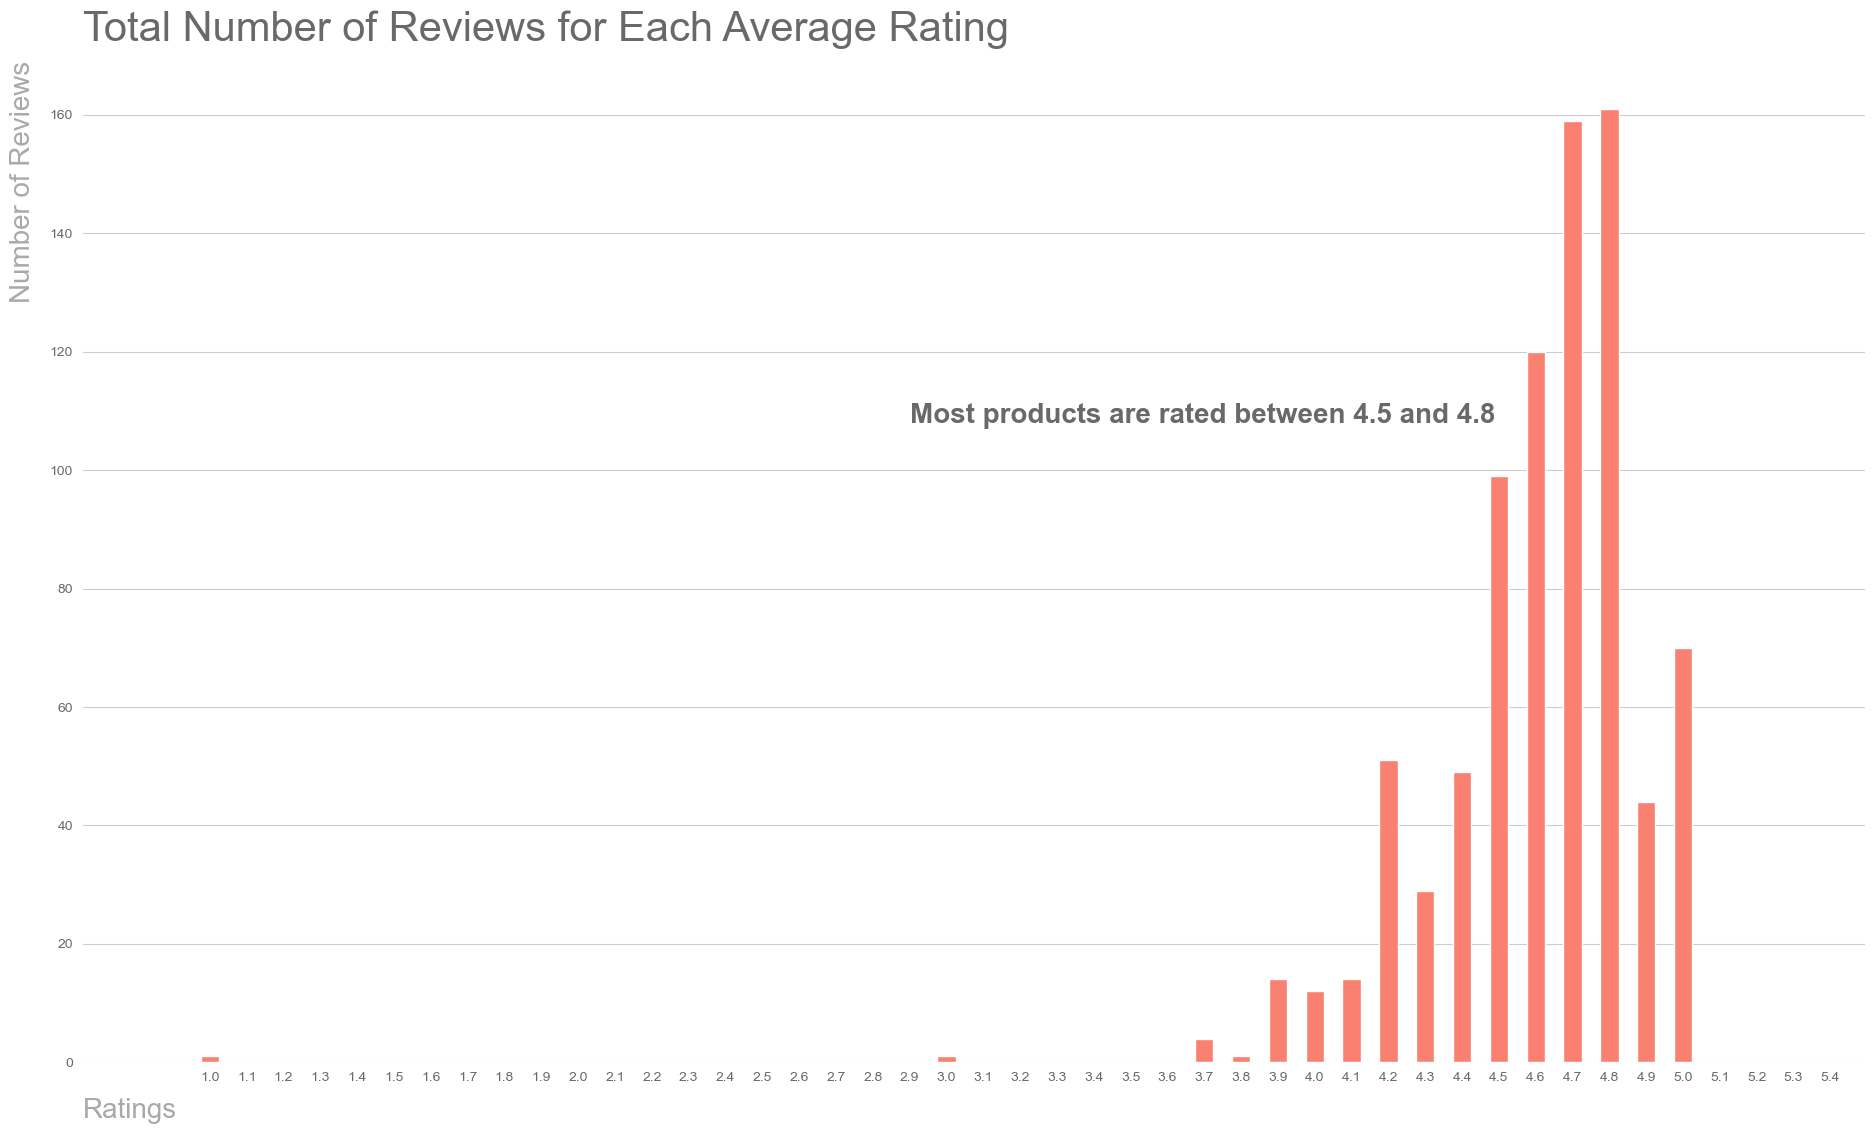

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# find counts of rating used
print(adidas["average_rating"].value_counts())
print("\n")

# set up the figure
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=[23,13])
plt.rc("axes.spines", top=False, bottom=False, left=False, right=False)
plt.grid(axis="y")

# plot histogram, xtick starts at 1 since 1 is the min rating and ends at 5.5 to show the 5 ratings
plt.hist(adidas["average_rating"], bins=np.arange(1,5.5,0.1)-0.125, width=0.05, color="salmon")

plt.title("Total Number of Reviews for Each Average Rating",fontsize=30,pad=15,loc="left",color="dimgrey")
plt.xlabel("Ratings", fontsize=20, loc="left", labelpad=10, color="darkgrey")
plt.ylabel("Number of Reviews", fontsize=20, loc="top", labelpad=10, color="darkgrey")
plt.xticks(np.arange(1,5.5,0.1),color="dimgrey")
plt.yticks(color="dimgrey")

plt.text(2.9,108,"Most products are rated between 4.5 and 4.8", fontsize=20, color="dimgrey", fontweight="bold")
plt.show()

## Ratings and Reviews for Breadcrumbs
Here, we are finding the total number of reviews for each category and the aggregated mean of each of those category's rating.

To get the number of reviews for each category, we group the sum number of reviews by category. To get the average rating for each category, we aggregate the average ratings into the mean grouped by each category.

In [19]:
# total number of reviews for each breadcrumb
sum_reviews = adidas.groupby(by="breadcrumbs").sum().sort_values(by=["reviews_count"], ascending=False)["reviews_count"]

# average rating of each breadcrumb
ave_rating = adidas.groupby(by="breadcrumbs").mean()["average_rating"].round(2)

# combine groupby outputs
crumb_rate = pd.concat([sum_reviews, ave_rating], axis=1).reset_index()
crumb_rate

,breadcrumbs,reviews_count,average_rating
0,Men/Shoes,115999,4.53
1,Women/Shoes,105119,4.48
2,Originals/Shoes,68028,4.50
3,Swim/Shoes,30821,4.60
4,Men/Clothing,13128,4.69
5,Kids/Shoes,9228,4.73
6,Women/Clothing,8722,4.59
7,Running/Shoes,2641,4.68
8,Training/Accessories,1737,4.88
9,Soccer/Shoes,1521,4.50


To plot our findings, it is best to use a scatter plot with the average ratings on the x-axis and total sum of reviews on the y-axis. Since we will have only 21 data points, we can label individual data point with their category name without the plot being too congested.

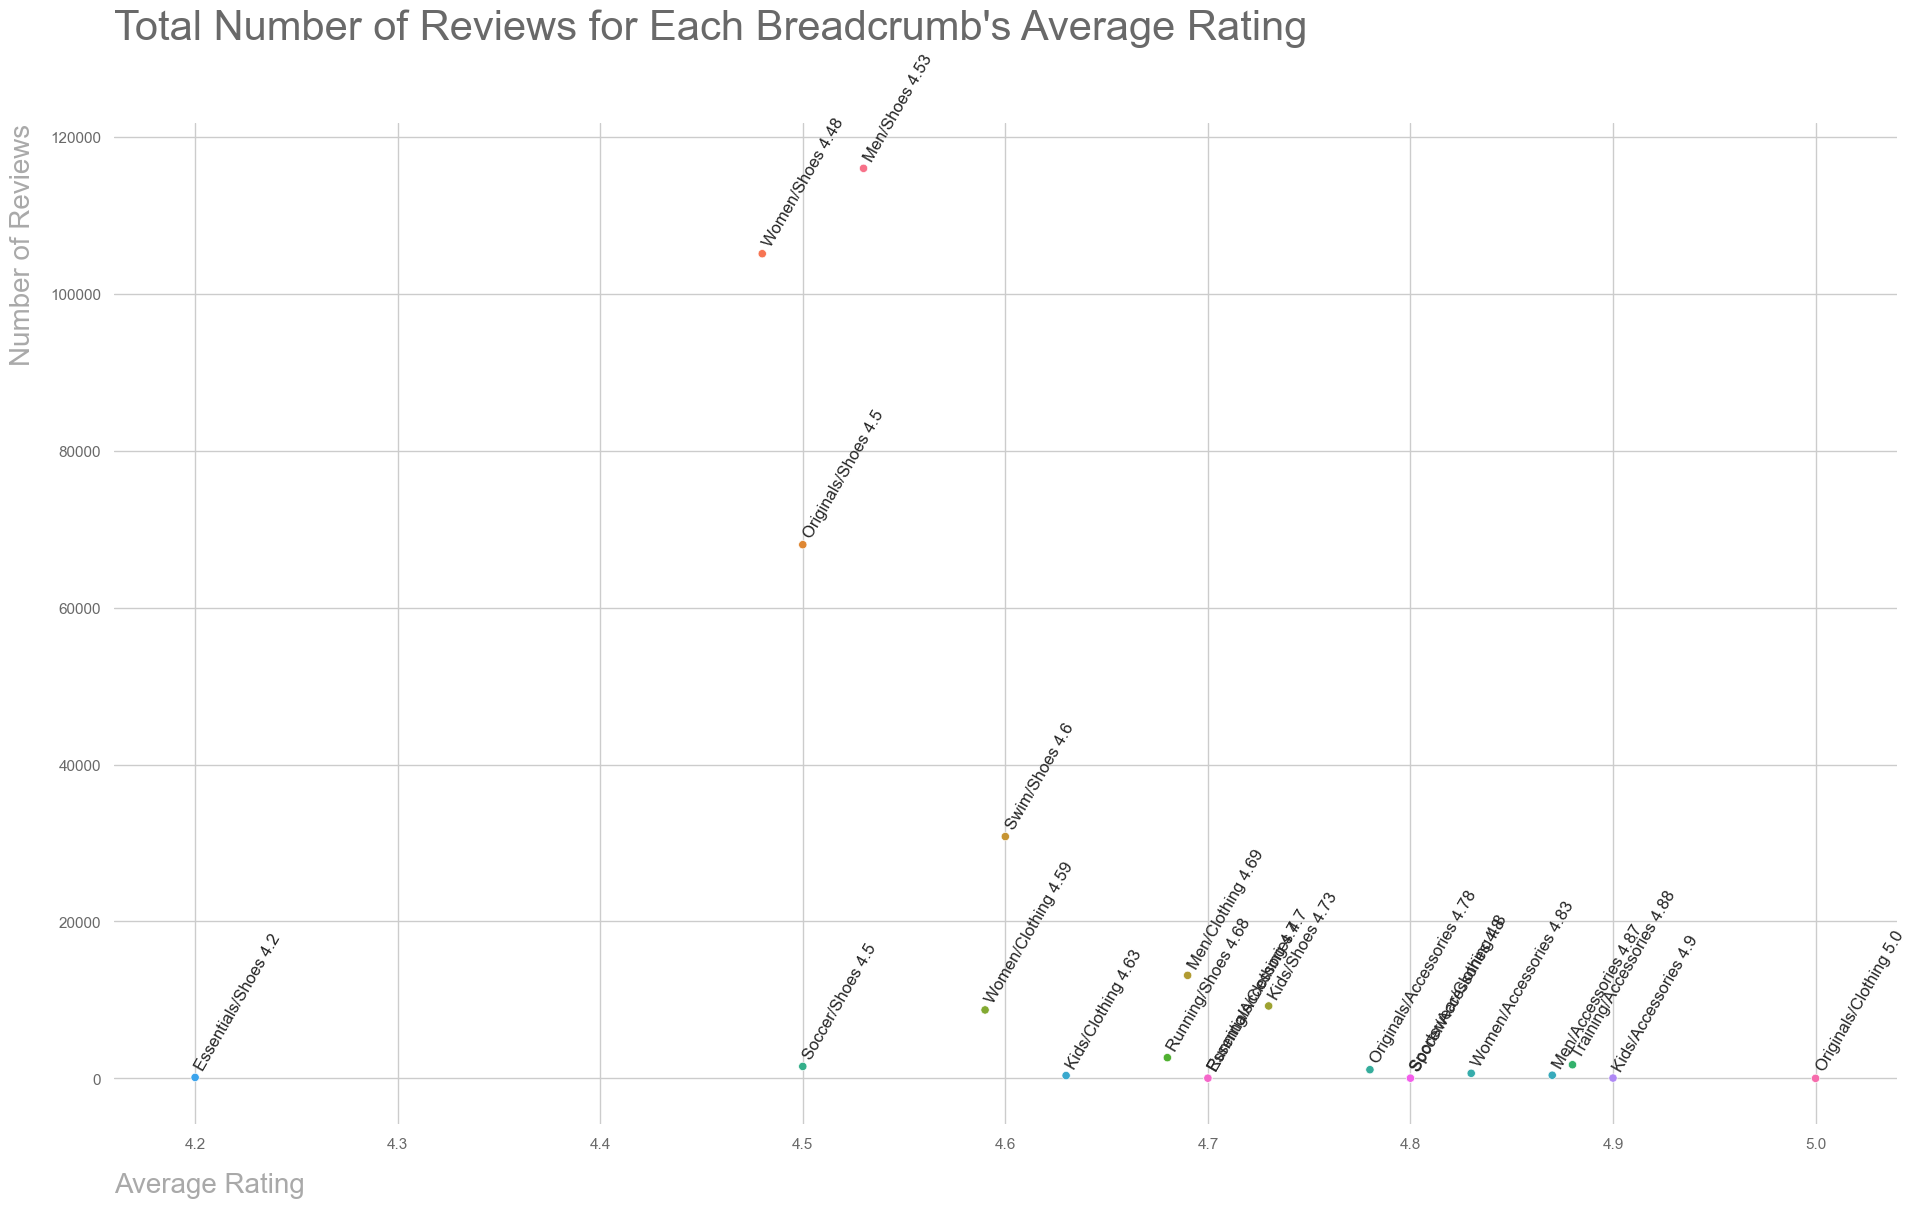

In [21]:
# set figure
plt.figure(figsize=[23,13])
sns.set(style="whitegrid")
plt.rc("axes.spines", top=False, bottom=False, left=False, right=False)

# plot scatterplot
sns.scatterplot(x=crumb_rate["average_rating"],
                y=crumb_rate["reviews_count"],
                data=crumb_rate, hue=crumb_rate["breadcrumbs"])

# remove legend
plt.legend([],[], frameon=False)

plt.title("Total Number of Reviews for Each Breadcrumb's Average Rating",fontsize=30,pad=60,loc='left',color="dimgrey")
plt.xlabel("Average Rating", fontsize=20, loc="left",labelpad=15,color="darkgrey")
plt.ylabel("Number of Reviews", fontsize=20, loc="top",labelpad=10,color="darkgrey")
plt.xticks(color="dimgrey")
plt.yticks(color="dimgrey")

# label and position each data point with the category name and rating number
for i in range(crumb_rate.shape[0]):
    plt.text(x=crumb_rate.average_rating[i]-0.001,
             y=crumb_rate.reviews_count[i]+1000,
             s=crumb_rate.breadcrumbs[i]+" "+str(crumb_rate.average_rating[i]),
             rotation=60)
    
plt.show()

Please note that 2 pairs of data points overlap each other on the visual, and their labels are not readable.
    
    At the rating of 4.7, the categories `Essentials/Shoes` and `Running/Accessories` overlap.
    At the rating of 4.8, the categories `Soccer/Accessories` and `Sportswear/Clothing` overlap.

We can see that shoes for men and women perform the best at over 100,000 reviews each at around a rating of 4.5. 

Clothing do not seem to be as popular with consumers but have higher average ratings.

## Total Number of Reviews for Each Color's Average Rating
We will be doing the exact same analysis from the previous cells except this time we will be grouping by color instead of categories.

In [24]:
# total number of reviews for each color
sum_color_reviews = adidas.groupby(by="color").sum().sort_values(by=["reviews_count"], ascending=False)["reviews_count"]

# average rating of each color
ave_color_rating = adidas.groupby(by="color").mean()["average_rating"].round(2)

# combine groupby outputs
crumb_color = pd.concat([sum_color_reviews, ave_color_rating], axis=1).reset_index()
crumb_color

,color,reviews_count,average_rating
0,White,161999,4.59
1,Black,65032,4.59
2,Blue,36441,4.60
3,Grey,28804,4.59
4,Pink,23306,4.58
5,Green,9803,4.62
6,Yellow,7121,4.58
7,Red,6987,4.64
8,Purple,6982,4.67
9,Gold,4083,4.67


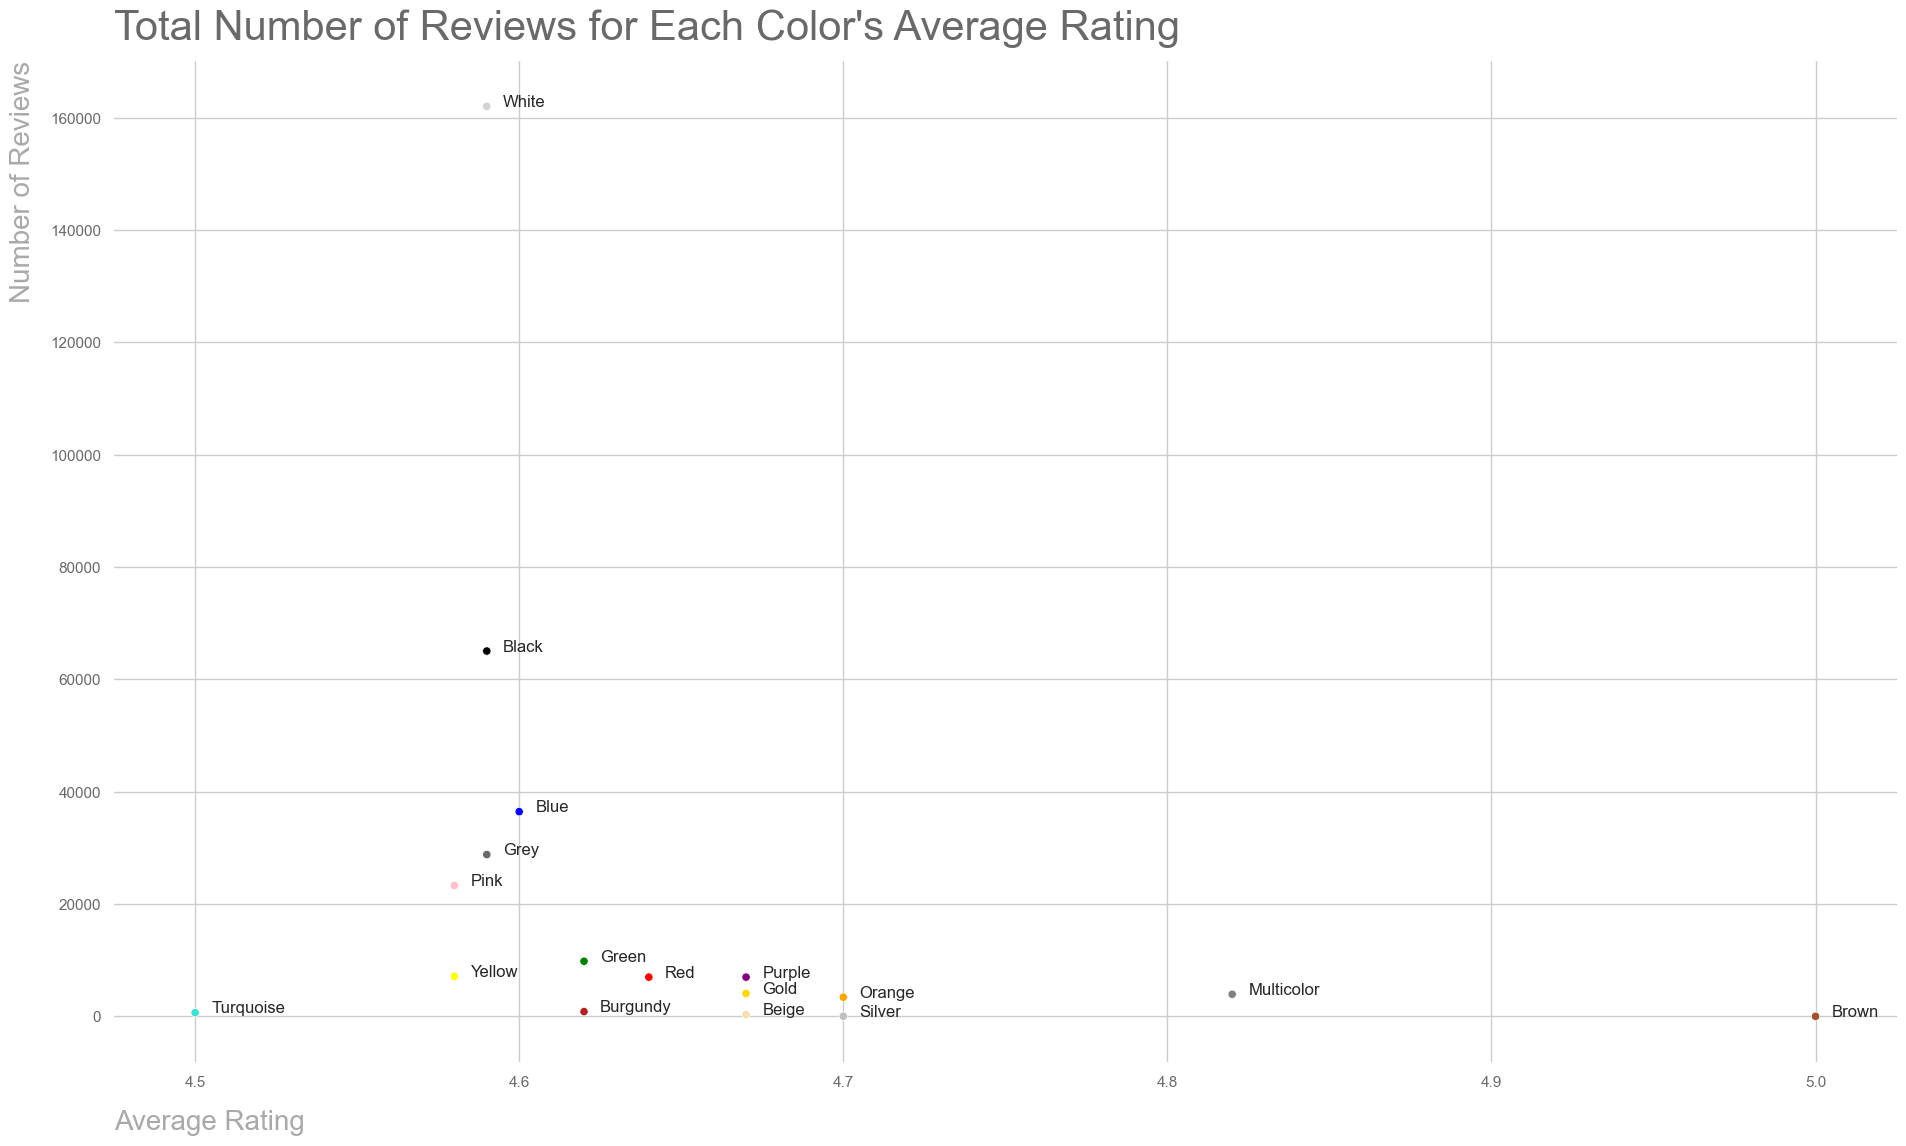

In [25]:
# set up figure
plt.figure(figsize=[23,13])
sns.set(style="whitegrid")
plt.rc("axes.spines", top=False, bottom=False, left=False, right=False)

# create color dictionary
color_dict = dict({"White": "lightgrey",
                   "Black": "black",
                   "Blue": "blue",
                   "Grey": "dimgrey",
                   "Pink": "pink",
                   "Green": "green",
                   "Yellow": "yellow",
                   "Red": "red",
                   "Purple": "purple",
                   "Gold": "gold",
                   "Multicolor": "grey",
                   "Orange": "orange",
                   "Burgundy": "firebrick",
                   "Turquoise": "turquoise",
                   "Beige": "wheat",
                   "Silver": "silver",
                   "Brown": "sienna"})

# plot scatterplot
sns.scatterplot(x=crumb_color["average_rating"],
                y=crumb_color["reviews_count"],
                data=crumb_color, hue=crumb_color["color"], palette=color_dict)

plt.legend([],[], frameon=False)
plt.title("Total Number of Reviews for Each Color's Average Rating",fontsize=30,pad=15,loc='left',color="dimgrey")
plt.xlabel("Average Rating", fontsize=20, loc="left",labelpad=15,color="darkgrey")
plt.ylabel("Number of Reviews", fontsize=20, loc="top",labelpad=10,color="darkgrey")
plt.xticks(color="dimgrey")
plt.yticks(color="dimgrey")

# set data point labels
for i in range(crumb_color.shape[0]):
    plt.text(x=crumb_color.average_rating[i]+0.005,
             y=crumb_color.reviews_count[i]+0.005,
             s=crumb_color.color[i])
    
plt.show()

It is evident here that white is by far the most popular color, followed by blue and black. All of which lie at around an average rating of 4.6. Other outliers such as brown and turquoise have a much higher or lower rating compared to white but such a smaller number of people have reviewed products of these colors.

## Total Number of Colors by Category
In this section, we are simply curious about how many of each color there are for each of the categories. We start by isolating the columns we only want to work with into a variable to make things easier.

In [28]:
# isolate columns being worked with
bread_color = adidas[["breadcrumbs", "color"]]
bread_color

,breadcrumbs,color
15,Women/Clothing,Purple
16,Women/Clothing,Pink
18,Women/Clothing,Green
19,Women/Clothing,Blue
20,Soccer/Shoes,Blue
...,...,...
840,Women/Shoes,White
841,Women/Shoes,White
842,Kids/Shoes,Black
843,Kids/Shoes,Pink


In [29]:
# find the count of each color grouped by breadcrumbs
color_crumb = bread_color.groupby(by=["breadcrumbs"])["color"].value_counts()

# decompress output
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    print(color_crumb)

breadcrumbs            color     
Essentials/Clothing    Blue           1
Essentials/Shoes       White          1
Kids/Accessories       Multicolor     1
Kids/Clothing          Blue           8
                       Black          5
                       Pink           5
                       Red            3
                       White          3
                       Grey           1
                       Orange         1
                       Yellow         1
Kids/Shoes             White         23
                       Black         15
                       Grey           8
                       Pink           8
                       Blue           4
                       Green          4
                       Purple         3
                       Red            2
                       Yellow         2
Men/Accessories        Multicolor     6
                       Grey           2
                       White          2
                       Beige          1
      

## Most Popular Colors Between Genders and Age Groups
We can drill in deeper from our previous findings to find the most popular colors between genders and age groups.

First, we need to separate the gender and age group from the `breadcrumbs` column by using the `/` delimiter and then isolate all the rows in the dataframe that contains `Men`, `Women`, and `Kids`.

In [31]:
# can see in the breadcrumbs column that it uses a "/" delimiter, can use this to split the column and isolate genders and ages
adidas.head()

,url,name,sku,selling_price,original_price,availability,color,category,breadcrumbs,description,average_rating,reviews_count
15,https://www.adidas.com/us/essentials-loose-log...,Essentials Loose Logo Tank Top,H07758,20,$25,InStock,Purple,Clothing,Women/Clothing,What's on the agenda? Whether it's a quick lun...,4.8,116
16,https://www.adidas.com/us/essentials-loose-log...,Essentials Loose Logo Tank Top,H07757,20,$25,InStock,Pink,Clothing,Women/Clothing,What's on the agenda? Whether it's a quick lun...,4.8,116
18,https://www.adidas.com/us/essentials-loose-log...,Essentials Loose Logo Tank Top,H07756,20,$25,InStock,Green,Clothing,Women/Clothing,What's on the agenda? Whether it's a quick lun...,4.8,116
19,https://www.adidas.com/us/formotion-sculpt-tig...,Formotion Sculpt Tights,GN9137,48,$80,InStock,Blue,Clothing,Women/Clothing,Sometimes confidence comes in a surprising for...,4.2,144
20,https://www.adidas.com/us/marvel-x-ghosted.3-f...,Marvel X Ghosted.3 Firm Ground Cleats,FZ1757,64,$80,InStock,Blue,Shoes,Soccer/Shoes,X has mutated to give you superhuman accelerat...,4.4,160


In [32]:
# split "breadcrumbs" column" by "/" into "gender_sport" and "product_category" columns
adidas[["gender_sport", "product_category"]] = adidas["breadcrumbs"].str.split("/", expand = True)

# drop "product_category" column since it is the same thing as the "category" column
adidas.drop(["product_category"], axis = 1, inplace = True)

In [33]:
# isolate rows that only contain "Women", "Men", or "Kids"
keywords = ["Women", "Men", "Kids"]
adidas_gender_age = adidas[adidas["gender_sport"].apply(lambda x: any(k in x for k in keywords))]

adidas_gender_age["gender_sport"].value_counts()

Women    342
Men      279
Kids      97
Name: gender_sport, dtype: int64

In [34]:
# find the total number of reviews for each color grouped by gender and age
pop_gender_sport = adidas_gender_age.groupby(by=["gender_sport","color"])["reviews_count"].sum().sort_values(ascending=False).reset_index()

with pd.option_context("display.max_rows", None, "display.max_columns", None):
    print(pop_gender_sport)

   gender_sport       color  reviews_count
0           Men       White          60972
1         Women       White          50837
2           Men       Black          21138
3         Women       Black          17167
4           Men        Grey          17095
5         Women        Pink          14780
6           Men        Blue          14702
7         Women        Blue           7972
8         Women      Purple           6844
9           Men       Green           5562
10          Men         Red           4699
11        Women        Grey           4016
12        Women        Gold           3812
13        Women  Multicolor           3526
14         Kids       White           3012
15        Women       Green           2730
16         Kids        Grey           2415
17          Men      Orange           2392
18         Kids       Black           2088
19        Women         Red           1667
20          Men      Yellow           1179
21          Men    Burgundy            746
22         

C:\Users\willi\AppData\Local\Temp\ipykernel_31352\4095459837.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax0.set_xticklabels(labels=men_gender_sport.color,rotation=90)
C:\Users\willi\AppData\Local\Temp\ipykernel_31352\4095459837.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels=women_gender_sport.color,rotation=90)
C:\Users\willi\AppData\Local\Temp\ipykernel_31352\4095459837.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(labels=kids_gender_sport.color,rotation=90)


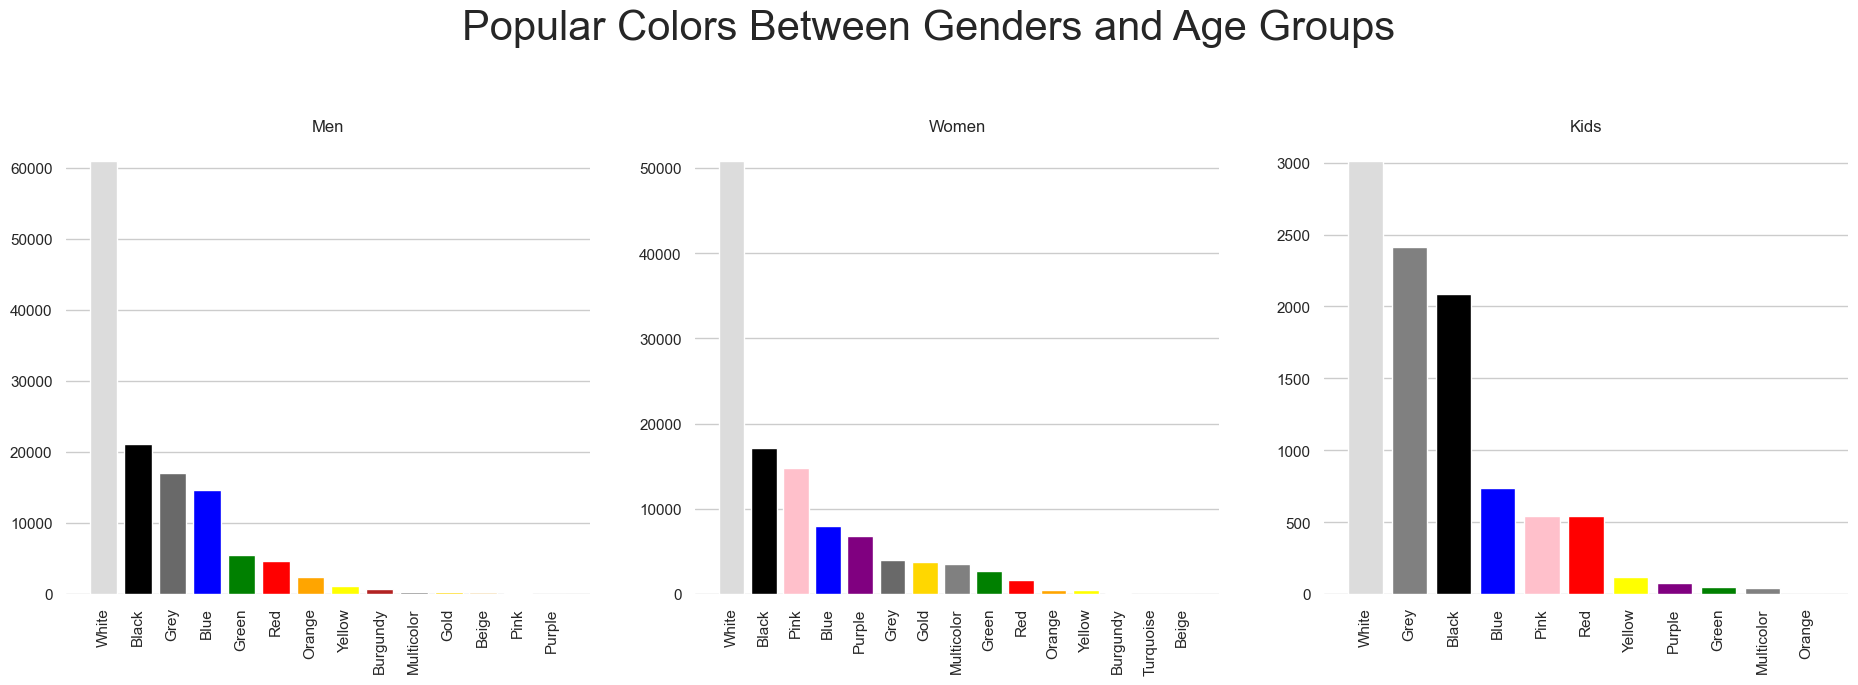

In [35]:
men_gender_sport = pop_gender_sport[pop_gender_sport["gender_sport"]=="Men"]
women_gender_sport = pop_gender_sport[pop_gender_sport["gender_sport"]=="Women"]
kids_gender_sport = pop_gender_sport[pop_gender_sport["gender_sport"]=="Kids"]

# set figure for subplot
fig = plt.figure(figsize=(23,13))

# insert subplots
ax0 = fig.add_subplot(2,3,1)
ax1 = fig.add_subplot(2,3,2)
ax2 = fig.add_subplot(2,3,3)

# remove y-axis grid lines
ax0.grid(axis="x")
ax1.grid(axis="x")
ax2.grid(axis="x")

# define colors for all the bars in each subplot
bar_color0 = ["gainsboro","black","dimgrey","blue","green","red","orange","yellow","firebrick","grey","gold","wheat","pink","purple"]
bar_color1 = ["gainsboro","black","pink","blue","purple","dimgrey","gold","grey","green","red","orange","yellow","firebrick","turquoise","wheat"]
bar_color2 = ["gainsboro","grey","black","blue","pink","red","yellow","purple","green","grey","orange"]

# plot barplots
ax0.bar(men_gender_sport.color, men_gender_sport.reviews_count, color=bar_color0)
ax1.bar(women_gender_sport.color, women_gender_sport.reviews_count, color=bar_color1)
ax2.bar(kids_gender_sport.color, kids_gender_sport.reviews_count, color=bar_color2)

# set subplot titles
ax0.title.set_text("Men")
ax1.title.set_text("Women")
ax2.title.set_text("Kids")

# rotate xtick labels to improve legibility
ax0.set_xticklabels(labels=men_gender_sport.color,rotation=90)
ax1.set_xticklabels(labels=women_gender_sport.color,rotation=90)
ax2.set_xticklabels(labels=kids_gender_sport.color,rotation=90)

# set title for entire figure
fig.suptitle("Popular Colors Between Genders and Age Groups",size=30)
plt.show()

Both men and women have a high preference for white, black, and blue. However men prefer grey, green, and red more than the women. Women prefer pink and purple much more than men. 

What is interesting is that kids favor grey far more than adult men and women, with grey being the 2nd most popular color.

---

## Word Cloud for Product Names and Descriptions
The dataframe contains 2 columns that are text heavy; the `name` and `description` columns. We want to know if there are any specific words that Adidas like to use for their advertising for these products. The most visual and intuitive way of doing this is by creating a word cloud.

In [38]:
adidas[["name", "description"]]

,name,description
15,Essentials Loose Logo Tank Top,What's on the agenda? Whether it's a quick lun...
16,Essentials Loose Logo Tank Top,What's on the agenda? Whether it's a quick lun...
18,Essentials Loose Logo Tank Top,What's on the agenda? Whether it's a quick lun...
19,Formotion Sculpt Tights,Sometimes confidence comes in a surprising for...
20,Marvel X Ghosted.3 Firm Ground Cleats,X has mutated to give you superhuman accelerat...
...,...,...
840,Supernova+ Shoes,Take off. Touch down. Repeat. These adidas run...
841,Choigo Shoes,"If you want drama, the bold female track and f..."
842,Daily 3.0 Shoes,The style is in the details of the Daily 3.0 S...
843,Daily 3.0 Shoes,The style is in the details of the Daily 3.0 S...


In [39]:
# initialize empty list and append every row in the "name" column into empty list
name_text = []
for words in adidas["name"]:
    name_text.append(words)
    
name_text[:10]

['Essentials Loose Logo Tank Top',
 'Essentials Loose Logo Tank Top',
 'Essentials Loose Logo Tank Top',
 'Formotion Sculpt Tights',
 'Marvel X Ghosted.3 Firm Ground Cleats',
 'Pureboost 21 Shoes',
 'Lite Racer BYD 2.0 Shoes',
 'Adilette Shower Slides',
 'Essentials Loose Logo Tank Top',
 'Conext 21 Mini Ball']

In [40]:
type(name_text)

list

---
The variable `name_text` is a list. A list cannot be used as an input for the creation of a word cloud and we must split the list into one massive string before moving on.

---

In [42]:
converted_list = map(str, name_text)
name_result = ' '.join(converted_list)
print(name_result[:2000])

Essentials Loose Logo Tank Top Essentials Loose Logo Tank Top Essentials Loose Logo Tank Top Formotion Sculpt Tights Marvel X Ghosted.3 Firm Ground Cleats Pureboost 21 Shoes Lite Racer BYD 2.0 Shoes Adilette Shower Slides Essentials Loose Logo Tank Top Conext 21 Mini Ball Essentials Logo Dress Copa Sense.3 Turf Shoes Best Version of Myself Slogan Graphic Tank Top Essentials 3-Stripes Full-Zip Hoodie Best Version of Myself Slogan Graphic Tank Top adidas Sportswear Future Icons Logo Graphic Tee FutureNatural Shoes Marvel Superhero Racer TR 2.0 Shoes Primegreen Essentials Warm-Up Slim 3-Stripes Track Jacket Sherpa Jacket Sherpa Jacket Yoga Pants AEROREADY Designed 2 Move Feelready Sport Long Sleeve Tee Essentials French Terry 3-Stripes Hoodie Fluidflash Shoes Essentials Slim Logo Shorts Essentials 3-Stripes Crop Top ZX 2K Boost Shoes Lite Racer BYD 2.0 Shoes Essentials 3-Stripes Full-Zip Hoodie ZX 2K Boost 2.0 Shoes Racer TR21 Shoes Aeromotion Pants ZX 2K Boost 2.0 Shoes Crew Sweatshirt A

---
If wordcloud is not showing, input the following commands in your terminal:

    pip install --upgrade pip
    pip install --upgrade Pillow
    
    https://github.com/amueller/word_cloud/issues/729

This style of word clouds come from this [Medium article.]("https://towardsdatascience.com/how-to-make-word-clouds-in-python-that-dont-suck-86518cdcb61f")

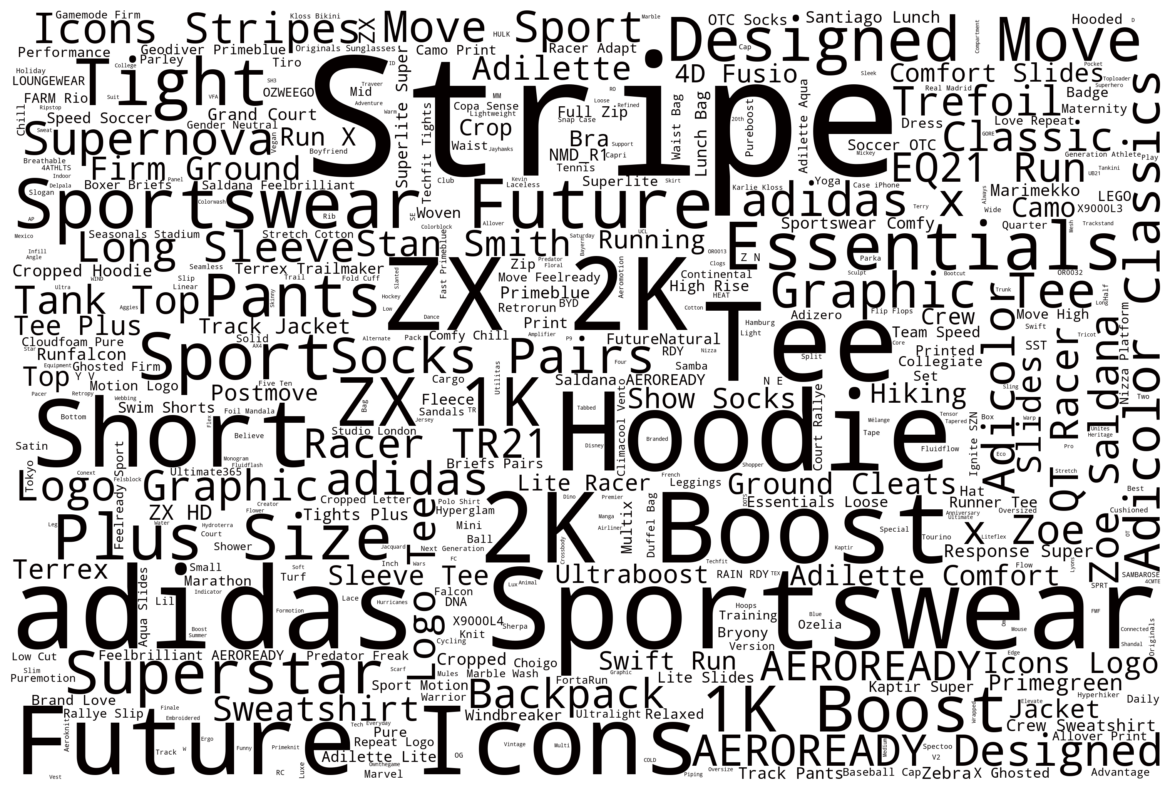

In [44]:
# import libraries for wordcloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# function for black color
def black_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return("hsl(0, 100%, 1%)")

# define stop words
stop_words = ["Shoes"] + list(STOPWORDS)

# create word cloud object
wordcloud = WordCloud(max_words=500, background_color="white", width=3000, height=2000, stopwords=stop_words).generate(name_result)

# recolor word cloud using black color function
wordcloud.recolor(color_func = black_color_func)

# set figsize and plot wordcloud onto figure
plt.figure(figsize=[15,10])
plt.imshow(wordcloud, interpolation='bilinear') # interpolation="bilinear" is for making the displayed image appear more smoothly
plt.axis("off")
plt.show()

In this word cloud of product descriptions, we can see that Adidas uses many words that make consumers feel like their atheletic performance is taken to the next level while also being in style. They use such words as "Boost", "Icons", "Future", and "Move". 

The word "Shoes" had to be defined as one of the stop words because shoes are Adidas' main focus and would have taken up too much space on the word cloud. By taking "Shoes" away, we can look at the other things Adidas likes to focus on. We can see that "Sportswear", "Hoodie", and "Tee" are very prominent here.

---

Next, we will do the exact same thing for the "description" column.

In [47]:
# extract all data points from the "description" column
description_text = []
for words in adidas["description"]:
    description_text.append(words)
    
# turn list into string
converted_des_list = map(str, description_text)
description_result = ' '.join(converted_des_list)
print(description_result[:2000])

What's on the agenda? Whether it's a quick lunch hour workout or a casual hang, you're covered with this adidas tank top. The fit is not too tight and not too loose — just perfectly comfortable. The high neck keeps things covered up front, and the racerback shows off your sports bra while also making sure you have a full range of motion. What's on the agenda? Whether it's a quick lunch hour workout or a casual hang, you're covered with this adidas tank top. The fit is not too tight and not too loose — just perfectly comfortable. The high neck keeps things covered up front, and the racerback shows off your sports bra while also making sure you have a full range of motion. What's on the agenda? Whether it's a quick lunch hour workout or a casual hang, you're covered with this adidas tank top. The fit is not too tight and not too loose — just perfectly comfortable. The high neck keeps things covered up front, and the racerback shows off your sports bra while also making sure you have a fu

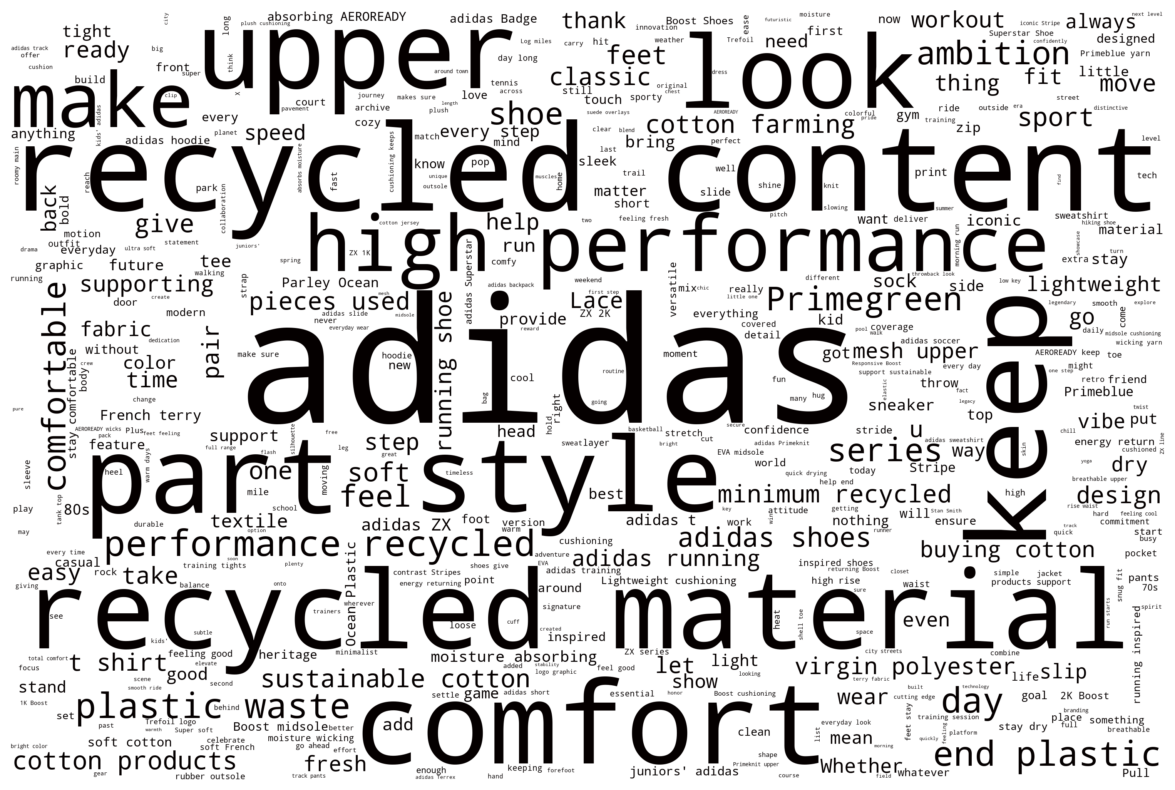

In [48]:
# define stop words
stop_words = ["made","product"] + list(STOPWORDS)

# create word cloud object
wordcloud = WordCloud(max_words=500,
                      background_color="white", width=3000, height=2000,
                      stopwords=stop_words).generate(description_result)

# recolor word cloud using previous black color function
wordcloud.recolor(color_func = black_color_func)

# set figsize and plot word cloud
plt.figure(figsize=[15,10])
plt.imshow(wordcloud, interpolation='bilinear') # interpolation="bilinear" is for making the displayed image appear more smoothly
plt.axis("off")
plt.show()

By observing the kinds of words Adidas uses to describe their products, they have a dedicated focus on sustainability by using recycled material and comfort to give users higher athletic performance.

---

## Show Ratings in Average Ratings Column That is Less Than 4.0
When we looked at the distribution of average ratings from the histogram we made earlier, the majority of products are rated at a 4 or higher. But there are a few that did not perform as well. Some products are rated at a 3.0 and there is even one item rated at a 1.0! Could there be any reason for these items to be rated so low and is there anything we can take from these ratings to make improvements?

In [51]:
adidas_low = adidas[adidas["average_rating"] < 4.0]
adidas_low

,url,name,sku,selling_price,original_price,availability,color,category,breadcrumbs,description,average_rating,reviews_count,gender_sport
66,https://www.adidas.com/us/zx-1k-boost-shoes/H6...,ZX 1K Boost Shoes,H68719,70,$100,InStock,Blue,Shoes,Originals/Shoes,"In a constantly evolving world, keeping up is ...",3.9,515,Originals
73,https://www.adidas.com/us/zx-1k-boost-shoes/FX...,ZX 1K Boost Shoes,FX6515,70,$100,InStock,Black,Shoes,Originals/Shoes,"In a constantly evolving world, keeping up is ...",3.9,515,Originals
101,https://www.adidas.com/us/designed-2-move-7-8-...,Designed 2 Move 7/8 Sport Tights (Maternity),GT0140,36,$45,InStock,Blue,Clothing,Women/Clothing,These adidas maternity sport tights balance su...,3.9,134,Women
109,https://www.adidas.com/us/designed-2-move-7-8-...,Designed 2 Move 7/8 Sport Tights (Maternity),GL3961,36,$45,InStock,Black,Clothing,Women/Clothing,These adidas maternity sport tights balance su...,3.9,134,Women
192,https://www.adidas.com/us/designed-to-move-hig...,Designed to Move High-Rise Sport Zebra 7/8 Tights,GR9652,36,$45,InStock,Black,Clothing,Women/Clothing,"Lunge, twist and stretch through your full ran...",3.7,20,Women
219,https://www.adidas.com/us/superstar-mules/FZ22...,Superstar Mules,FZ2267,60,$85,InStock,Beige,Shoes,Women/Shoes,Reconstructed. Reimagined. Ever since they fir...,3.9,60,Women
222,https://www.adidas.com/us/designed-to-move-hig...,Designed to Move High-Rise Sport Zebra 7/8 Tights,GT0135,36,$45,InStock,Blue,Clothing,Women/Clothing,"Lunge, twist and stretch through your full ran...",3.7,20,Women
223,https://www.adidas.com/us/superstar-mules/FZ22...,Superstar Mules,FZ2268,60,$85,InStock,Black,Shoes,Women/Shoes,Reconstructed. Reimagined. Ever since they fir...,3.9,60,Women
315,https://www.adidas.com/us/college-tee/HF9214.html,College Tee,HF9214,23,$28,InStock,White,Clothing,Men/Clothing,It's all how you look at it. With this adidas ...,3.0,2,Men
404,https://www.adidas.com/us/holiday-graphic-tigh...,Holiday Graphic Tights (Plus Size),H56733,36,$45,InStock,Burgundy,Clothing,Women/Clothing,From ice skating to collaborative cooking effo...,3.7,3,Women


In [52]:
print(adidas_low[["color"]].value_counts())
print("\n")

print(adidas_low[["breadcrumbs"]].value_counts())
print("\n")

print(adidas_low[["gender_sport"]].value_counts())

color   
Black       6
Blue        4
White       4
Green       2
Grey        2
Beige       1
Burgundy    1
Orange      1
dtype: int64


breadcrumbs    
Women/Clothing     6
Men/Shoes          5
Originals/Shoes    5
Women/Shoes        3
Men/Clothing       2
dtype: int64


gender_sport
Women           9
Men             7
Originals       5
dtype: int64


From our findings, both men and women have a similar amount of negative reviews about some Adidas products. However, women have more concerns about clothing, and men with shoes; most of the reviews rated at less than 4 are concerning shoes. 

We would like to figure out more details about why these products are rated lower but we do not have access to individual review descriptions about these products. We would have to request more data containing reviews relating to these products. Another word map can be used to figure out what are the main problems with these products but this is as far as we can go with this analysis.

---

# Conclusion
In this exploratory data analysis, we learned many things such as how every product is typically rated, which colors are the most used and purchased, as well as what Adidas likes to focus on based on product descriptions.

The purpose of this project would be to analyze the performance of products in the online store and to see what kinds of products are directed to which kind of audience. From the word map, Adidas places value in sustainability and performance in tantem with style. Adidas is mostly doing well with the feedback in which they recieve from customers and knows which products to prioritize along with its colors.

Although a small number out of the total products, there is room for improvement with products such as womens' clothing and mens' shoes. If able to find the reason for why these items are rated lower, Adidas can learn from these potential findings and apply to the rest of their products.